In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.5
learning_rate=1e-3
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)

In [6]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


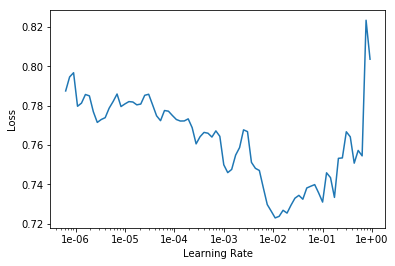

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:04
epoch  train_loss  valid_loss  accuracy
1      0.664265    0.567366    0.752896  (00:01)
2      0.661578    0.525589    0.772201  (00:01)
3      0.576361    0.490949    0.733591  (00:01)
4      0.532567    0.479375    0.737452  (00:01)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:53
epoch  train_loss  valid_loss  accuracy
1      0.514220    0.464201    0.760618  (00:03)
2      0.540362    0.431840    0.806950  (00:02)
3      0.580119    0.460247    0.745174  (00:02)
4      0.566885    0.430059    0.841699  (00:02)
5      0.495492    0.533653    0.683398  (00:02)
6      0.456691    0.322447    0.880309  (00:03)
7      0.475141    0.369962    0.814672  (00:03)
8      0.525854    0.328068    0.864865  (00:02)
9      0.517305    0.320078    0.857143  (00:02)
10     0.451004    0.298903    0.864865  (00:02)
11     0.474290    0.278385    0.915058  (00:02)
12     0.442199    0.267790    0.911197  (00:02)
13     0.427391    0.256705    0.899614  (00:02)
14     0.393748    0.237443    0.907336  (00:02)
15     0.419627    0.336533    0.868726  (00:02)
16     0.379562    0.236414    0.930502  (00:02)
17     0.429017    0.231681    0.918919  (00:02)
18     0.435050    0.276049    0.891892  (00:02)
19     0.370758    0.234512    0.926641  (00:02)
20     0.37

In [11]:
learn.validate()

[0.24757847, tensor(0.9112)]

In [12]:
accuracy_list.append(learn.validate()[1].item())

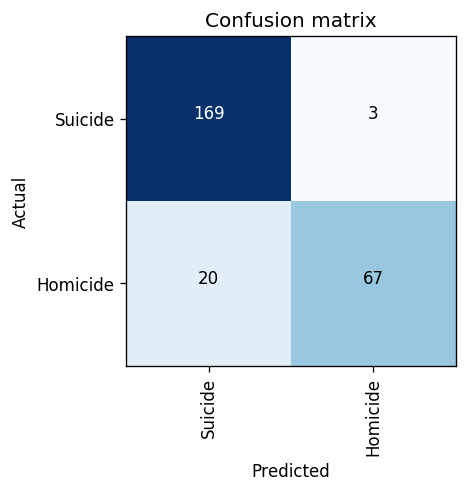

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

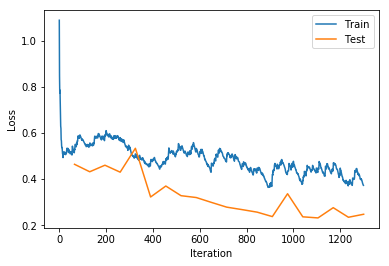

In [14]:
learn.recorder.plot_losses()

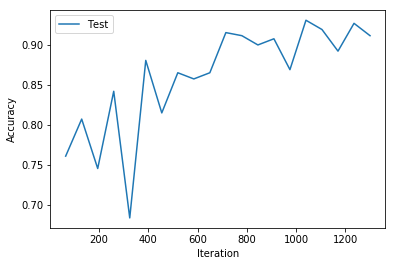

In [15]:
learn.recorder.plot_metrics()

In [16]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [17]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


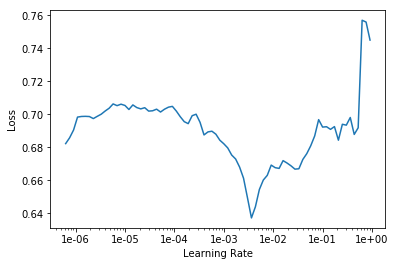

In [18]:
learn.recorder.plot()

In [19]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:04
epoch  train_loss  valid_loss  accuracy
1      0.668738    0.574763    0.733591  (00:01)
2      0.643667    0.524065    0.764479  (00:01)
3      0.621886    0.530147    0.760618  (00:01)
4      0.604286    0.492782    0.768340  (00:01)



In [20]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:52
epoch  train_loss  valid_loss  accuracy
1      0.608771    0.550150    0.691120  (00:02)
2      0.566640    0.448275    0.683398  (00:02)
3      0.546553    0.501675    0.722008  (00:02)
4      0.548238    0.428467    0.833977  (00:02)
5      0.511995    0.397639    0.787645  (00:02)
6      0.505551    0.311344    0.911197  (00:02)
7      0.513482    0.464693    0.714286  (00:02)
8      0.484353    0.293983    0.888031  (00:02)
9      0.484698    0.337957    0.845560  (00:02)
10     0.464782    0.322633    0.837838  (00:02)
11     0.439593    0.276011    0.899614  (00:02)
12     0.423483    0.272948    0.884170  (00:02)
13     0.437837    0.323166    0.837838  (00:02)
14     0.423757    0.249648    0.930502  (00:02)
15     0.433682    0.253983    0.915058  (00:02)
16     0.426677    0.257105    0.903475  (00:02)
17     0.385145    0.222989    0.899614  (00:02)
18     0.332583    0.224641    0.918919  (00:02)
19     0.421137    0.243597    0.891892  (00:02)
20     0.35

In [21]:
learn.validate()

[0.20894255, tensor(0.9266)]

In [22]:
accuracy_list.append(learn.validate()[1].item())

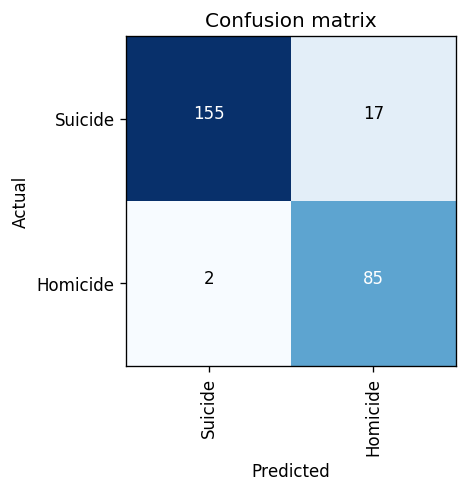

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

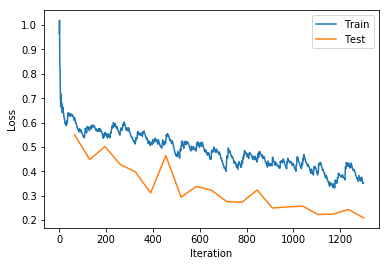

In [24]:
learn.recorder.plot_losses()

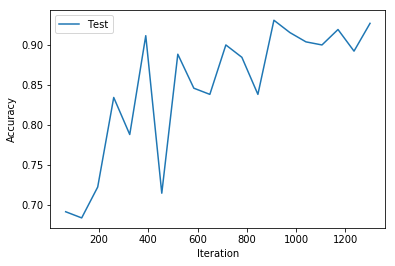

In [25]:
learn.recorder.plot_metrics()

In [26]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [27]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


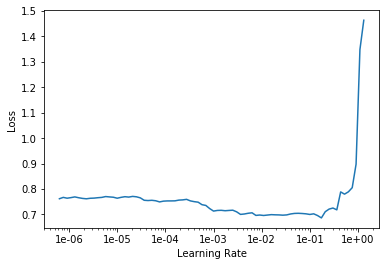

In [28]:
learn.recorder.plot()

In [29]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:04
epoch  train_loss  valid_loss  accuracy
1      0.630141    0.629661    0.586873  (00:01)
2      0.562465    0.514516    0.787645  (00:01)
3      0.609772    0.479772    0.810811  (00:01)
4      0.555377    0.491834    0.733591  (00:01)



In [30]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:53
epoch  train_loss  valid_loss  accuracy
1      0.575333    0.476412    0.776062  (00:02)
2      0.521459    0.436648    0.891892  (00:02)
3      0.544492    0.462040    0.787645  (00:02)
4      0.470036    0.369280    0.833977  (00:02)
5      0.505103    0.371765    0.830116  (00:02)
6      0.525353    0.380605    0.818533  (00:02)
7      0.468296    0.394773    0.803089  (00:02)
8      0.444934    0.252346    0.922780  (00:02)
9      0.445104    0.472477    0.698842  (00:02)
10     0.446037    0.278930    0.888031  (00:02)
11     0.414264    0.290183    0.899614  (00:02)
12     0.488245    0.332756    0.880309  (00:02)
13     0.451915    0.304556    0.888031  (00:02)
14     0.368988    0.318675    0.857143  (00:03)
15     0.444351    0.275050    0.911197  (00:02)
16     0.435614    0.248105    0.911197  (00:02)
17     0.356331    0.273852    0.891892  (00:02)
18     0.394241    0.345609    0.845560  (00:02)
19     0.341075    0.311849    0.868726  (00:02)
20     0.39

In [31]:
learn.validate()

[0.2206955, tensor(0.9112)]

In [32]:
accuracy_list.append(learn.validate()[1].item())

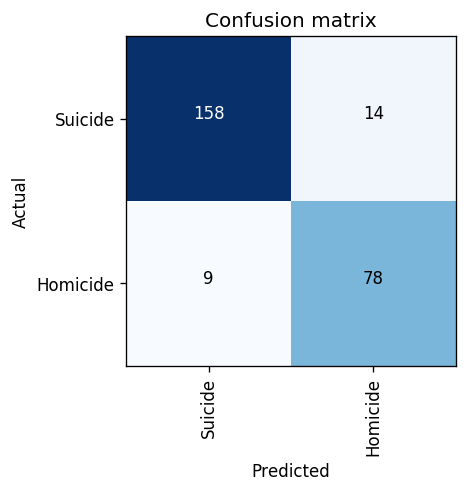

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

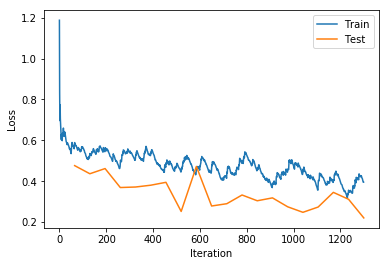

In [34]:
learn.recorder.plot_losses()

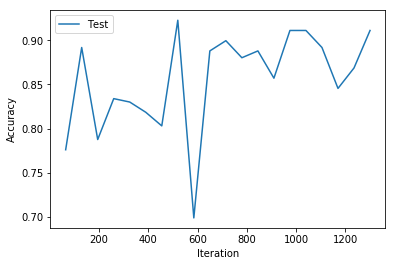

In [35]:
learn.recorder.plot_metrics()

In [36]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [37]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


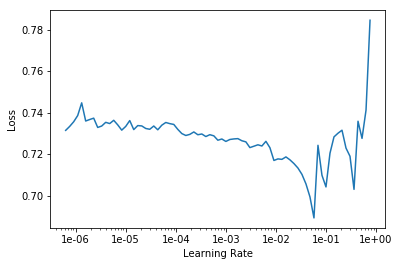

In [38]:
learn.recorder.plot()

In [39]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:04
epoch  train_loss  valid_loss  accuracy
1      0.680262    0.526446    0.779923  (00:01)
2      0.575998    0.482437    0.772201  (00:01)
3      0.590515    0.469090    0.729730  (00:01)
4      0.561341    0.458643    0.772201  (00:01)



In [40]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:54
epoch  train_loss  valid_loss  accuracy
1      0.548273    0.488493    0.787645  (00:02)
2      0.515300    0.444448    0.779923  (00:02)
3      0.499493    0.412565    0.806950  (00:02)
4      0.498641    0.388796    0.779923  (00:02)
5      0.489127    0.328858    0.888031  (00:02)
6      0.502393    0.318360    0.861004  (00:02)
7      0.470611    0.296531    0.915058  (00:02)
8      0.485959    0.310877    0.857143  (00:02)
9      0.460599    0.278942    0.872587  (00:02)
10     0.491066    0.324047    0.861004  (00:02)
11     0.500797    0.303496    0.888031  (00:02)
12     0.493927    0.305743    0.888031  (00:02)
13     0.445896    0.261487    0.907336  (00:02)
14     0.470150    0.265759    0.899614  (00:02)
15     0.437819    0.263291    0.903475  (00:02)
16     0.371010    0.235571    0.918919  (00:03)
17     0.389611    0.248810    0.930502  (00:02)
18     0.373695    0.248975    0.884170  (00:02)
19     0.432491    0.243977    0.907336  (00:02)
20     0.34

In [41]:
learn.validate()

[0.26214316, tensor(0.9112)]

In [42]:
accuracy_list.append(learn.validate()[1].item())

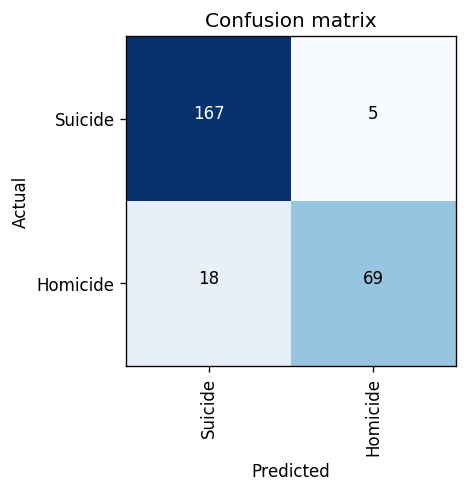

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

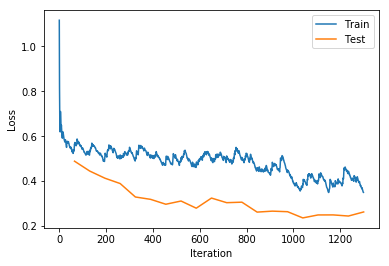

In [44]:
learn.recorder.plot_losses()

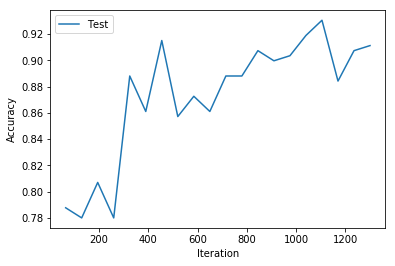

In [45]:
learn.recorder.plot_metrics()

In [46]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [47]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


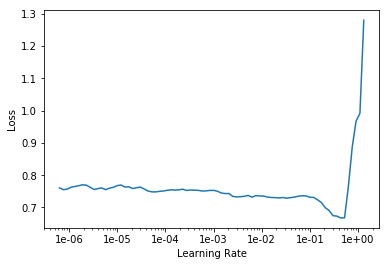

In [48]:
learn.recorder.plot()

In [49]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:04
epoch  train_loss  valid_loss  accuracy
1      0.644392    0.510562    0.810811  (00:01)
2      0.619008    0.445133    0.826255  (00:01)
3      0.587213    0.442516    0.822394  (00:01)
4      0.502705    0.503092    0.725869  (00:01)



In [50]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:56
epoch  train_loss  valid_loss  accuracy
1      0.567500    0.471020    0.779923  (00:02)
2      0.535229    0.406985    0.783784  (00:02)
3      0.529643    0.431473    0.787645  (00:02)
4      0.551117    0.418887    0.752896  (00:02)
5      0.507956    0.316406    0.864865  (00:02)
6      0.488562    0.356068    0.814672  (00:03)
7      0.516182    0.290234    0.891892  (00:02)
8      0.459326    0.245693    0.903475  (00:03)
9      0.448281    0.371764    0.806950  (00:02)
10     0.412000    0.246872    0.918919  (00:02)
11     0.397551    0.408896    0.803089  (00:03)
12     0.450128    0.263261    0.907336  (00:02)
13     0.415851    0.248080    0.888031  (00:02)
14     0.397748    0.288758    0.876448  (00:02)
15     0.370268    0.257296    0.895753  (00:02)
16     0.424113    0.249036    0.915058  (00:02)
17     0.346890    0.219825    0.918919  (00:03)
18     0.373749    0.230758    0.899614  (00:02)
19     0.343332    0.301238    0.880309  (00:03)
20     0.33

In [51]:
learn.validate()

[0.21459739, tensor(0.9305)]

In [52]:
accuracy_list.append(learn.validate()[1].item())

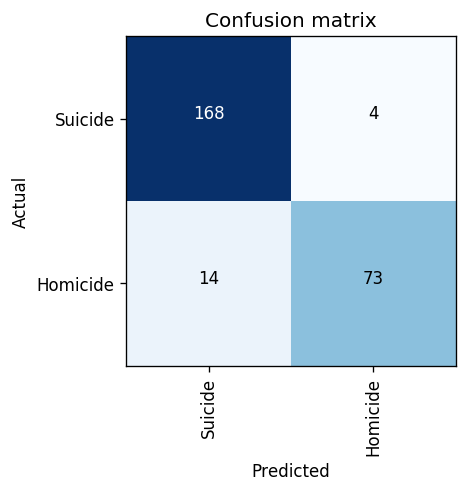

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

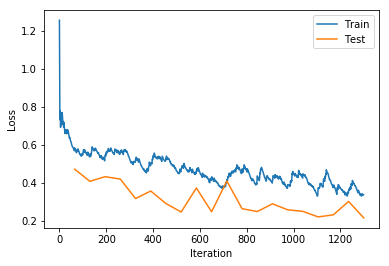

In [54]:
learn.recorder.plot_losses()

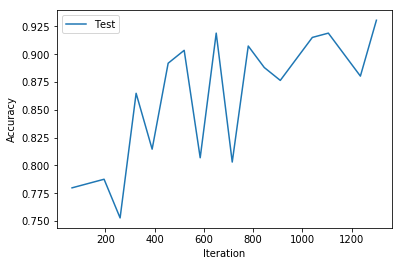

In [55]:
learn.recorder.plot_metrics()

In [56]:
print(accuracy_list)

[0.9111968874931335, 0.9266409277915955, 0.9111968874931335, 0.9111968874931335, 0.9305019378662109]


In [57]:
print(sum(accuracy_list)/len(accuracy_list))

0.9181467056274414


In [59]:
import torch

torch.cuda.empty_cache()